In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pathConfig as pc  # path config file imported
#path = pc.PATH_CONFIG['pathData']


path = "datasets/Annotated4.csv" #ubunutu/linux


#path = "..\data\AnnotatedData3.csv"

def extract (path):
    fd= open(path,encoding="utf-8", errors='replace')
    df = pd.read_csv(fd)   
    defined=df['class'] != ("undefined")
    # #output dataframe without undeined
    df2=df[defined]
    defined1=df2['class'] !="Undefined"
    df4=df2[defined1]
    #replace no PI with no
    df3=df4.replace("No PI","no")
    #replace PI with yes
    final=df3.replace("PI","yes")
    
    replace_yes=final.replace("Yes","yes")
    final_df= replace_yes.replace("No","no")
    return final_df, df

final_data_frame, data_frame_undefined = extract(path)

final_data_frame.head()

,class,text
0,no,i'll buy the iphone x if it can get ac...
1,no,Some dude in FB selling the iPhone X 64 gb...
2,yes,Home dab emote man today and I get hopped on...
3,yes,Buy an iPhone X
4,no,I hate iOS 11. My iPhone 6+ works 10X slower...


In [3]:
!pip install matplotlib


     |████████████████████████████████| 11.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 23 kB/s eta 0:00:011
You should consider upgrading via the '/home/namitha/majorproject/mp/bin/python -m pip install --upgrade pip' command.


yes    698
no     463
Name: class, dtype: int64


Text(0.5, 1.0, 'Count of Intention')

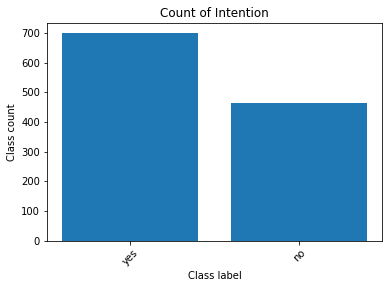

In [16]:
class_count=final_data_frame['class'].value_counts()
print(class_count)
Index = [1,2]
plt.bar(Index,class_count)
plt.xticks(Index,['yes','no'],rotation=45)
plt.ylabel('Class count')
plt.xlabel('Class label')
plt.title('Count of Intention')

In [17]:
frequent_words =  pd.Series(' '.join(final_data_frame['text']).lower().split()).value_counts()[:25]
print('top 25 words in the data')
print(frequent_words)

top 25 words in the data
iphone    1238
x         1144
the       1012
i          962
to         567
and        343
a          343
my         330
buy        305
get        303
is         271
an         238
it         232
for        214
like       189
so         176
want       173
you        171
this       167
but        164
on         157
in         157
of         156
that       155
me         148
dtype: int64


In [18]:
from wordcloud import WordCloud,STOPWORDS

negative_reviews = final_data_frame[final_data_frame['class'].isin(['no'])]
positive_reviews = final_data_frame[final_data_frame['class'].isin(['yes'])]

negative_reviews_str = negative_reviews.text.str.cat()
positive_reviews_str = positive_reviews.text.str.cat()

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)

plt.show()

ModuleNotFoundError: No module named 'wordcloud'